In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install pycaret

!pip install markupsafe==2.1.1

!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 6.8 MB 24.0 MB/s 
     |████████████████████████████████| 2.0 MB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 46.0 MB/s 
     |████████████████████████████████| 1.7 MB 51.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 315 kB 60.5 MB/s 
     |████████████████████████████████| 17.0 MB 19.8 MB/s 
     |████████████████████████████████| 3.3 MB 40.7 MB/s 
     |████████████████████████████████| 167 kB 47.3 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 141 kB 62.8 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 8.5 MB/s 
     |████████████████████████████████| 3.1 MB 59.7 MB/s 
     |████████████████████████████████| 303 kB 71.4 MB/s 
     |████████████████████████████████| 102 kB 12.3 MB/s 
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: markupsafe


In [ ]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

import lightgbm 

from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pycaret import classification

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/sample data_MORG (1).xlsx',engine = 'openpyxl')

In [ ]:
data

,HUMAN ID,성별,나이,키,가슴너비,허리너비,엉덩이너비,가슴두께,허리두께,엉덩이두께,...,배둘레,엉덩이둘레,어깨너비,장딴지둘레,종아리최소둘레,몸무게,골격근량,체지방량,BMI,체지방률
0,120100196,남,7,1330.000000,206.000000,198.000000,239.0,151.0,175.000000,157.0,...,664.000000,727.0,276.0,286.0,181.0,31.6,11.1,9.3,17.9,29.3
1,120100197,남,7,1160.000000,179.000000,148.000000,198.0,128.0,118.000000,125.0,...,498.000000,572.0,235.0,233.0,150.0,19.4,8.3,2.5,14.4,12.7
2,120100198,남,7,1243.000000,208.000000,195.000000,216.0,129.0,130.000000,146.0,...,557.000000,627.0,286.0,265.0,161.0,23.6,9.6,3.8,15.4,16.3
3,120100199,남,7,1144.000000,206.000000,173.000000,200.0,126.0,130.000000,145.0,...,507.000000,602.0,260.0,239.0,160.0,19.9,7.3,4.0,15.3,20.2
4,120100200,남,7,1277.000000,235.930615,238.363337,255.0,142.0,195.000000,182.0,...,743.846722,770.0,310.0,308.0,199.0,37.1,12.4,12.7,22.7,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,220105675,여,13,1632.000000,252.000000,215.000000,320.0,161.0,160.000000,207.0,...,782.000000,916.0,335.0,335.0,212.0,52.1,21.3,12.6,19.6,24.2
4872,220105676,여,13,1394.498785,214.000000,196.000000,253.0,147.0,133.000000,164.0,...,629.000000,728.0,296.0,261.0,182.0,30.1,12.0,6.3,15.6,20.9
4873,220105677,여,13,1527.000000,242.000000,222.000000,304.0,180.0,161.000000,195.0,...,724.000000,844.0,335.0,341.0,209.0,48.0,18.3,13.4,20.5,27.9
4874,220105678,여,13,1457.000000,217.000000,206.000000,268.0,157.0,153.382488,257.0,...,652.000000,748.0,315.0,286.0,194.0,34.6,14.2,6.9,16.2,19.9


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

In [ ]:
#설치
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
plt.rc("font", family = "NanumBarunGothic")
sns.set(font="NanumBarunGothic", 
rc={"axes.unicode_minus":False}, style='white')

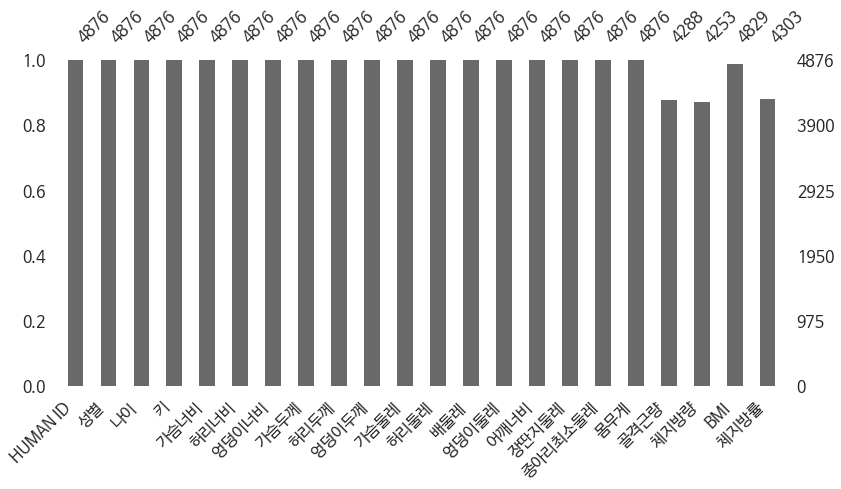

In [ ]:
train_copy = data.copy()
msno.bar(df=train_copy.iloc[:, 0:22], figsize=(13,6))

결측치가 존재한다. ----> 평균값으로 전원 대체

In [ ]:
list_A= ['골격근량','체지방량','BMI','체지방률']

In [ ]:
for i in list_A:
  data.loc[data[i] != data[i], i] = data[i].mean()

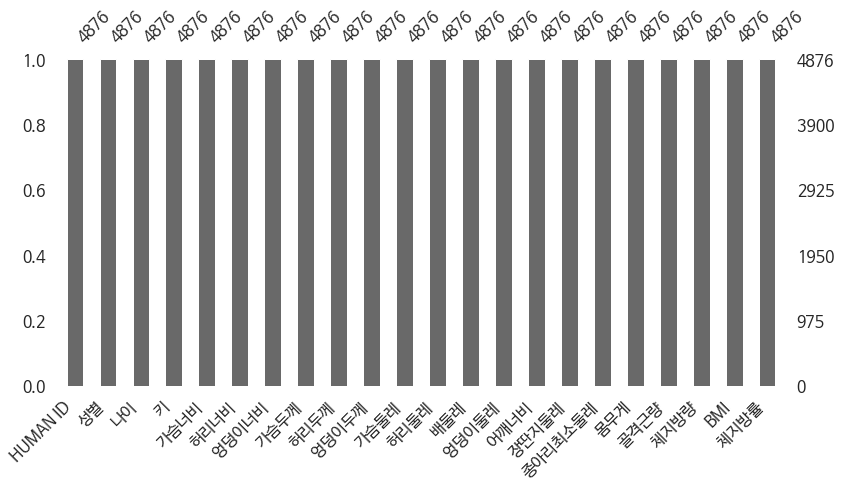

In [ ]:
train_copy = data.copy()
msno.bar(df=train_copy.iloc[:, 0:22], figsize=(13,6))

#eda

In [ ]:
def identify_count(df, col):

  print(df[col].unique())

  print(df[col].value_counts())

  sns.countplot(data=df, x=col)
  plt.show()

In [ ]:
def outlier_iqr(data):
  q1,q3 = np.percentile(data,[25,75])

  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

#성별

['남' '여']
남    2609
여    2267
Name: 성별, dtype: int64


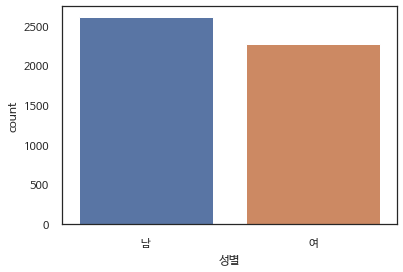

In [ ]:
identify_count(data, '성별')

In [ ]:
data['성별'].describe()

count     4876
unique       2
top          남
freq      2609
Name: 성별, dtype: object

#나이

[ 7  8  9 10 11 12 13]
13    862
11    857
12    851
10    703
9     618
8     505
7     480
Name: 나이, dtype: int64


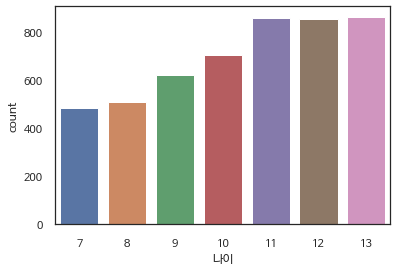

In [ ]:
identify_count(data, '나이')

In [ ]:
data['나이'].describe()

count    4876.000000
mean       10.425964
std         1.926457
min         7.000000
25%         9.000000
50%        11.000000
75%        12.000000
max        13.000000
Name: 나이, dtype: float64

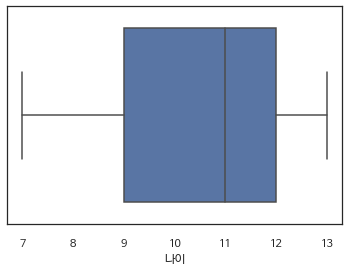

In [ ]:
sns.boxplot(data['나이'])

#키

In [ ]:
data['키']

0       1330.000000
1       1160.000000
2       1243.000000
3       1144.000000
4       1277.000000
           ...     
4871    1632.000000
4872    1394.498785
4873    1527.000000
4874    1457.000000
4875    1565.000000
Name: 키, Length: 4876, dtype: float64

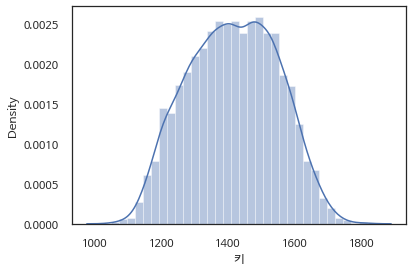

In [ ]:
sns.distplot(data['키'])

키의 데이터가 이상하게 분포되어 있음. 좀 고지자. 소수점을 고치면 될 듯하다.

In [ ]:
data['키'] = data['키'].mul(0.1)

In [ ]:
data['키'].describe()

count    4876.000000
mean      141.572861
std        13.307700
min       105.004109
25%       131.400000
50%       141.750000
75%       151.825000
max       181.700000
Name: 키, dtype: float64

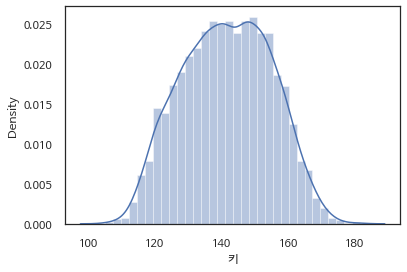

In [ ]:
sns.distplot(data['키'])

이렇게 보면 구간별로 설정하기가 너무 어렵다. 따라서 우리는 구간을 설정해주어야 한다.

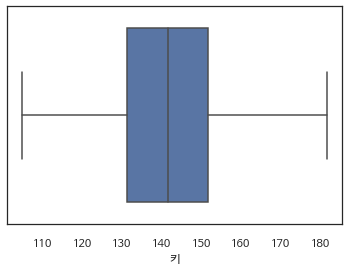

In [ ]:
sns.boxplot(data['키'])

In [ ]:
data_cp = data.copy()

우린 나이와 키에 대해 살펴보았으므로, 해당 아동이 나이대비 키가 큰지, 작은지를 알 수 있다.

In [ ]:
data_cp

,HUMAN ID,성별,나이,키,가슴너비,허리너비,엉덩이너비,가슴두께,허리두께,엉덩이두께,...,배둘레,엉덩이둘레,어깨너비,장딴지둘레,종아리최소둘레,몸무게,골격근량,체지방량,BMI,체지방률
0,120100196,남,7,133.000000,206.000000,198.000000,239.0,151.0,175.000000,157.0,...,664.000000,727.0,276.0,286.0,181.0,31.6,11.1,9.3,17.9,29.3
1,120100197,남,7,116.000000,179.000000,148.000000,198.0,128.0,118.000000,125.0,...,498.000000,572.0,235.0,233.0,150.0,19.4,8.3,2.5,14.4,12.7
2,120100198,남,7,124.300000,208.000000,195.000000,216.0,129.0,130.000000,146.0,...,557.000000,627.0,286.0,265.0,161.0,23.6,9.6,3.8,15.4,16.3
3,120100199,남,7,114.400000,206.000000,173.000000,200.0,126.0,130.000000,145.0,...,507.000000,602.0,260.0,239.0,160.0,19.9,7.3,4.0,15.3,20.2
4,120100200,남,7,127.700000,235.930615,238.363337,255.0,142.0,195.000000,182.0,...,743.846722,770.0,310.0,308.0,199.0,37.1,12.4,12.7,22.7,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,220105675,여,13,163.200000,252.000000,215.000000,320.0,161.0,160.000000,207.0,...,782.000000,916.0,335.0,335.0,212.0,52.1,21.3,12.6,19.6,24.2
4872,220105676,여,13,139.449879,214.000000,196.000000,253.0,147.0,133.000000,164.0,...,629.000000,728.0,296.0,261.0,182.0,30.1,12.0,6.3,15.6,20.9
4873,220105677,여,13,152.700000,242.000000,222.000000,304.0,180.0,161.000000,195.0,...,724.000000,844.0,335.0,341.0,209.0,48.0,18.3,13.4,20.5,27.9
4874,220105678,여,13,145.700000,217.000000,206.000000,268.0,157.0,153.382488,257.0,...,652.000000,748.0,315.0,286.0,194.0,34.6,14.2,6.9,16.2,19.9


[연령별 신체 크기](https://knhanes.kdca.go.kr/knhanes/sub08/sub08_02.do)

*   항목 추가
*   항목 추가



# 가슴너비

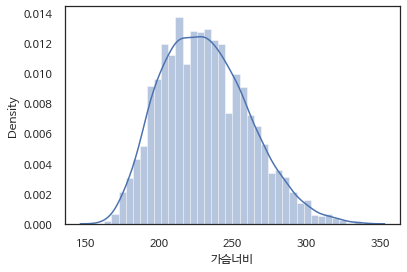

In [ ]:
sns.distplot(data['가슴너비'])

기준을 mm에서 cm로 변환하기 위해서 소수점 한자리를 당긴다.

In [ ]:
data['가슴너비'] = data['가슴너비'].mul(0.1)

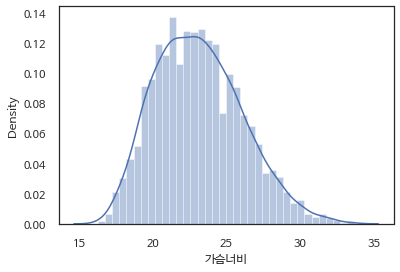

In [ ]:
sns.distplot(data['가슴너비'])

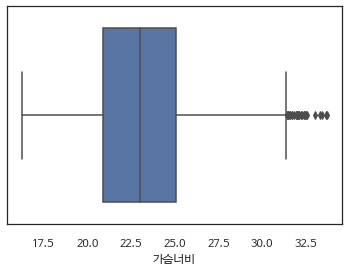

In [ ]:
sns.boxplot(data['가슴너비'])

대량의 이상치들이 잡힌다. 이걸 잡자.

In [ ]:
data['가슴너비'].describe()

count    4876.000000
mean       23.143638
std         2.962970
min        16.300000
25%        20.900000
50%        23.000000
75%        25.100000
max        33.700000
Name: 가슴너비, dtype: float64

In [ ]:
outlier_iqr(data['가슴너비'])

(array([1591, 1615, 2001, 2037, 2084, 2151, 2247, 2275, 2285, 2303, 2368,
        2392, 2458, 2476, 2489, 2493, 2499, 2502, 2516, 2526, 2540, 2548,
        2566, 2579, 2596, 2605, 2606, 2607, 4357, 4626, 4661, 4706]),)

In [ ]:
outlier = [1591, 1615, 2001, 2037, 2084, 2151, 2247, 2275, 2285, 2303, 2368,
        2392, 2458, 2476, 2489, 2493, 2499, 2502, 2516, 2526, 2540, 2548,
        2566, 2579, 2596, 2605, 2606, 2607, 4357, 4626, 4661, 4706]

In [ ]:
data.loc[outlier, ['가슴너비']] = 23.143638

In [ ]:
outlier_iqr(data['가슴너비'])

(array([1242, 1868, 1982, 2012, 2367]),)

In [ ]:
outlier.clear()

In [ ]:
outlier = [1242, 1868, 1982, 2012, 2367]

In [ ]:
data.loc[outlier, ['가슴너비']] = 23.143638

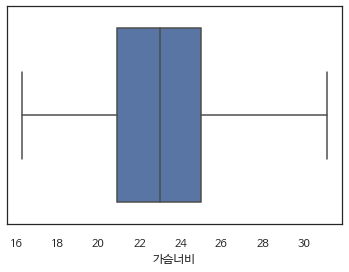

In [ ]:
sns.boxplot(data['가슴너비'])

이상치를 평균값으로 대체

#허리너비

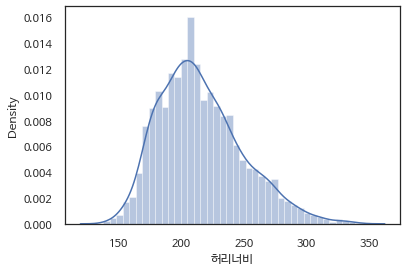

In [ ]:
sns.distplot(data['허리너비'])

In [ ]:
data['허리너비'] = data['허리너비'].mul(0.1)

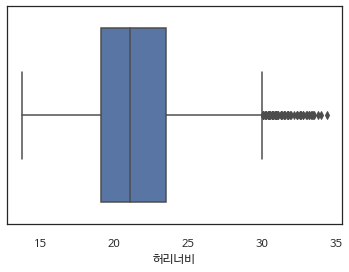

In [ ]:
sns.boxplot(data['허리너비'])

대량의 이상치가 존재한다.

In [ ]:
outlier_iqr(data['허리너비'])

(array([ 837,  955, 1009, 1075, 1085, 1190, 1242, 1248, 1278, 1298, 1305,
        1333, 1342, 1377, 1380, 1492, 1501, 1502, 1539, 1584, 1587, 1589,
        1591, 1611, 1615, 1658, 1677, 1693, 1708, 1868, 1884, 1920, 1937,
        1940, 1982, 2001, 2037, 2042, 2045, 2079, 2084, 2093, 2095, 2151,
        2206, 2237, 2247, 2250, 2275, 2285, 2303, 2310, 2315, 2329, 2367,
        2368, 2392, 2427, 2458, 2489, 2493, 2499, 2502, 2516, 2525, 2530,
        2540, 2579, 2606, 3794]),)

In [ ]:
outlier = [ 837,  955, 1009, 1075, 1085, 1190, 1242, 1248, 1278, 1298, 1305,
        1333, 1342, 1377, 1380, 1492, 1501, 1502, 1539, 1584, 1587, 1589,
        1591, 1611, 1615, 1658, 1677, 1693, 1708, 1868, 1884, 1920, 1937,
        1940, 1982, 2001, 2037, 2042, 2045, 2079, 2084, 2093, 2095, 2151,
        2206, 2237, 2247, 2250, 2275, 2285, 2303, 2310, 2315, 2329, 2367,
        2368, 2392, 2427, 2458, 2489, 2493, 2499, 2502, 2516, 2525, 2530,
        2540, 2579, 2606, 3794]

In [ ]:
data['허리너비'].describe()

count    4876.000000
mean       21.546324
std         3.343979
min        13.800000
25%        19.100000
50%        21.100000
75%        23.500000
max        34.414710
Name: 허리너비, dtype: float64

In [ ]:
data.loc[outlier, ['허리너비']] = 13.800000

In [ ]:
outlier_iqr(data['허리너비'])

(array([], dtype=int64),)

#엉덩이 너비

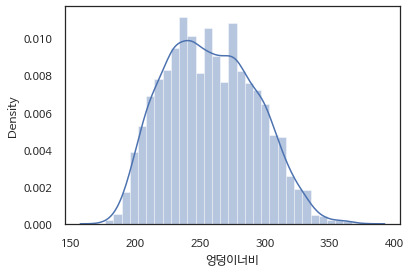

In [ ]:
sns.distplot(data['엉덩이너비'])

#bmi

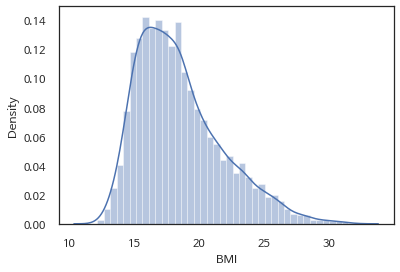

In [ ]:
sns.distplot(data['BMI'])

일단 이렇게 eda를 진행할 예정임

빠르게 모델을 돌리기 위헤 automl중 하나인 pycaret를 사용해서 대략적인 학습을 해보려 한다.

타겟값을 만들어야 함. 우리는 체지방률을 예측하는 모델을 만들어야 하기 때문에 나이 대비 체지방률을 예측하는 target값을 만들어야 한다.

체지방률은 체지방률 % = {체지방량(kg) ÷ 체중(kg)}× 100으로 간편하게 구할 수 있다.

만일 이 서비스를 사용하는 고객들은 각자의 자녀들이 동일 나이대비 과체중인지, 또는 채지방률이 높은지를 관심있어햘 것으로 생각해서 우리는 target값으로 동일 나이대비 체지방률이 높으면 1, 평균 또는 평균 이하라면 0을 나타내는 타겟값을 만들어야 한다.

통상적으로 20~30부터 비만으로 나타내기 때문에 여기 기획안에서는 

20이하 0

20~30 1

30~ 40 2

50이상 3

으로 타겟값을 잡고, 

각각 정상, 경도, 중경도, 고도로 예측한다.

In [ ]:
data['target'] = ""

In [ ]:
data

,HUMAN ID,성별,나이,키,가슴너비,허리너비,엉덩이너비,가슴두께,허리두께,엉덩이두께,...,엉덩이둘레,어깨너비,장딴지둘레,종아리최소둘레,몸무게,골격근량,체지방량,BMI,체지방률,target
0,120100196,남,7,133.000000,20.600000,19.800000,239.0,151.0,175.000000,157.0,...,727.0,276.0,286.0,181.0,31.6,11.1,9.3,17.9,29.3,
1,120100197,남,7,116.000000,17.900000,14.800000,198.0,128.0,118.000000,125.0,...,572.0,235.0,233.0,150.0,19.4,8.3,2.5,14.4,12.7,
2,120100198,남,7,124.300000,20.800000,19.500000,216.0,129.0,130.000000,146.0,...,627.0,286.0,265.0,161.0,23.6,9.6,3.8,15.4,16.3,
3,120100199,남,7,114.400000,20.600000,17.300000,200.0,126.0,130.000000,145.0,...,602.0,260.0,239.0,160.0,19.9,7.3,4.0,15.3,20.2,
4,120100200,남,7,127.700000,23.593061,23.836334,255.0,142.0,195.000000,182.0,...,770.0,310.0,308.0,199.0,37.1,12.4,12.7,22.7,34.1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,220105675,여,13,163.200000,25.200000,21.500000,320.0,161.0,160.000000,207.0,...,916.0,335.0,335.0,212.0,52.1,21.3,12.6,19.6,24.2,
4872,220105676,여,13,139.449879,21.400000,19.600000,253.0,147.0,133.000000,164.0,...,728.0,296.0,261.0,182.0,30.1,12.0,6.3,15.6,20.9,
4873,220105677,여,13,152.700000,24.200000,22.200000,304.0,180.0,161.000000,195.0,...,844.0,335.0,341.0,209.0,48.0,18.3,13.4,20.5,27.9,
4874,220105678,여,13,145.700000,21.700000,20.600000,268.0,157.0,153.382488,257.0,...,748.0,315.0,286.0,194.0,34.6,14.2,6.9,16.2,19.9,


In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(4876)):
  if data['체지방률'][i] < 20:
    data['target'][i] = 0
  elif 20<= data['체지방률'][i] < 30:
    data['target'][i] = 1
  elif 30<= data['체지방률'][i] < 40:
    data['target'][i] = 2
  elif 40<= data['체지방률'][i] < 50:
    data['target'][i] = 3


100%|██████████| 4876/4876 [00:01<00:00, 2565.52it/s]


In [ ]:
data

,HUMAN ID,성별,나이,키,가슴너비,허리너비,엉덩이너비,가슴두께,허리두께,엉덩이두께,...,엉덩이둘레,어깨너비,장딴지둘레,종아리최소둘레,몸무게,골격근량,체지방량,BMI,체지방률,target
0,120100196,남,7,133.000000,20.600000,19.800000,239.0,151.0,175.000000,157.0,...,727.0,276.0,286.0,181.0,31.6,11.1,9.3,17.9,29.3,1
1,120100197,남,7,116.000000,17.900000,14.800000,198.0,128.0,118.000000,125.0,...,572.0,235.0,233.0,150.0,19.4,8.3,2.5,14.4,12.7,0
2,120100198,남,7,124.300000,20.800000,19.500000,216.0,129.0,130.000000,146.0,...,627.0,286.0,265.0,161.0,23.6,9.6,3.8,15.4,16.3,0
3,120100199,남,7,114.400000,20.600000,17.300000,200.0,126.0,130.000000,145.0,...,602.0,260.0,239.0,160.0,19.9,7.3,4.0,15.3,20.2,1
4,120100200,남,7,127.700000,23.593061,23.836334,255.0,142.0,195.000000,182.0,...,770.0,310.0,308.0,199.0,37.1,12.4,12.7,22.7,34.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,220105675,여,13,163.200000,25.200000,21.500000,320.0,161.0,160.000000,207.0,...,916.0,335.0,335.0,212.0,52.1,21.3,12.6,19.6,24.2,1
4872,220105676,여,13,139.449879,21.400000,19.600000,253.0,147.0,133.000000,164.0,...,728.0,296.0,261.0,182.0,30.1,12.0,6.3,15.6,20.9,1
4873,220105677,여,13,152.700000,24.200000,22.200000,304.0,180.0,161.000000,195.0,...,844.0,335.0,341.0,209.0,48.0,18.3,13.4,20.5,27.9,1
4874,220105678,여,13,145.700000,21.700000,20.600000,268.0,157.0,153.382488,257.0,...,748.0,315.0,286.0,194.0,34.6,14.2,6.9,16.2,19.9,0


타겟값을 만들었으므로 바로 automl로 돌린다.

In [ ]:
data_cp = data.copy()

In [ ]:
X,y = data_cp.drop("target", axis =1), data_cp['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
classification_setup = classification.setup(data=data_cp, target='target',fold_strategy='stratifiedkfold')

,Description,Value
0,session_id,4995
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,": 0, 0: 1, 1: 2, 2: 3, 3: 4"
4,Original Data,"(4876, 23)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
top5_model = classification.compare_models(fold = 5, round = 3, sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.999,0.400,0.918,0.999,0.999,0.999,0.999,0.026
gbc,Gradient Boosting Classifier,0.999,0.400,0.918,0.999,0.999,0.999,0.999,4.798
lightgbm,Light Gradient Boosting Machine,0.999,0.400,0.918,0.999,0.999,0.999,0.999,0.870
rf,Random Forest Classifier,0.993,0.400,0.885,0.993,0.993,0.989,0.989,0.790
lda,Linear Discriminant Analysis,0.962,0.399,0.751,0.965,0.962,0.941,0.942,0.034
lr,Logistic Regression,0.961,0.399,0.781,0.963,0.962,0.940,0.940,2.064
et,Extra Trees Classifier,0.961,0.399,0.849,0.960,0.960,0.939,0.939,0.934
ada,Ada Boost Classifier,0.797,0.340,0.480,0.656,0.714,0.649,0.704,0.478
ridge,Ridge Classifier,0.780,0.000,0.533,0.764,0.764,0.647,0.650,0.022
svm,SVM - Linear Kernel,0.746,0.000,0.518,0.734,0.712,0.597,0.620,0.114


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4995, splitter='best'), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
            

In [ ]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9985,0.9992,0.8000,0.9971,0.9978,0.9977,0.9977
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9985,0.0000,0.7905,1.0000,0.9992,0.9977,0.9977
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9994,0.3998,0.9181,0.9994,0.9994,0.9991,0.9991
Std,0.0007,0.4897,0.1004,0.0011,0.0008,0.0011,0.0011


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4995, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9985,0.9985,0.8000,0.9971,0.9978,0.9977,0.9977
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9985,0.0000,0.7905,1.0000,0.9992,0.9977,0.9977
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9994,0.3997,0.9181,0.9994,0.9994,0.9991,0.9991
Std,0.0007,0.4895,0.1004,0.0011,0.0008,0.0011,0.0011


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4995, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


현재 타겟값을 임의로 만들어 약간 과대적합이 일어난 상태다. 하지만 대략적으로 모델을 돌렸을때 매우 정확도가 높은 것을 알 수 있다.

In [ ]:
evaluate_model(dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4995, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…